In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline
import seaborn as sns

In [2]:
os.chdir('E:\personal project\enova mockdown\Participant Files')

In [3]:
df=pd.read_csv('training.csv')

In [4]:
df.head()

,property_id,zone,sub_type,street_name,street_number,address_line_2,city_name,zip_code,days_on_market,build_date,...,basement,central_hvac,misc_features,exterior_color,exterior_material,initial_price,initial_value,purchase_decision,investment,final_price
0,1677886,residential,single family home,Thompson Prairie,45,NaN,Kellyfurt,91133,65,1971-11-22,...,1.0,0,NaN,grey,wood,128000.0,119400.0,1,41590,155000.0
1,5185610,residential,townhouse,Powell Gateway,13,NaN,New Gilbertside,66853,33,1977-12-01,...,0.0,1,NaN,grey,wood,184000.0,188500.0,1,34950,237000.0
2,8329034,residential,single family home,Elizabeth Mountain,68,NaN,South Robertville,99996,69,2012-09-19,...,1.0,1,NaN,white,brick,224000.0,218500.0,1,61050,278000.0
3,4831786,residential,townhouse,Bradley Well,51,NaN,Kellyland,25448,119,1904-09-23,...,0.0,0,patio,grey,brick,263000.0,277900.0,1,54320,361000.0
4,3621202,residential,single family home,Hendrix Run,275,NaN,South Suzannemouth,40464,110,1916-12-05,...,0.0,1,NaN,other,concrete_poured,265000.0,265700.0,1,44690,323000.0


In [5]:
df.dtypes[df.dtypes!='object']

property_id                     int64
street_number                   int64
address_line_2                float64
zip_code                        int64
days_on_market                  int64
current_population              int64
population_5_years_ago          int64
schools_in_area               float64
public_transit_score          float64
crime_score                   float64
culture_score                 float64
average_neighborhood_price    float64
overall_inspector_score       float64
sqft                          float64
floors_in_building            float64
floors_in_unit                float64
floor_of_unit                 float64
bedrooms                      float64
bathrooms                     float64
parking                         int64
basement                      float64
central_hvac                    int64
initial_price                 float64
initial_value                 float64
purchase_decision               int64
investment                      int64
final_price 

In [6]:
for i in ['street_number','zip_code','parking','central_hvac','basement']:
    df[i]=df[i].astype('object')

In [7]:
df.dtypes[df.dtypes=='object']

zone                        object
sub_type                    object
street_name                 object
street_number               object
city_name                   object
zip_code                    object
build_date                  object
remodel_date                object
area_type                   object
damage_code                 object
inspection_type             object
structural_quality_grade    object
exterior_condition_grade    object
interior_condition_grade    object
utilities_grade             object
damage_and_issue_grade      object
parking                     object
basement                    object
central_hvac                object
misc_features               object
exterior_color              object
exterior_material           object
dtype: object

address_line_2                1.00000
misc_features                 0.93660
damage_code                   0.86295
average_neighborhood_price    0.81610
floor_of_unit                 0.72465
bathrooms                     0.52785
bedrooms                      0.52785
remodel_date                  0.40505
crime_score                   0.10765
culture_score                 0.10625
floors_in_unit                0.05395
floors_in_building            0.05395
basement                      0.05395
public_transit_score          0.03840
schools_in_area               0.03840
sqft                          0.03790
overall_inspector_score       0.02510
dtype: float64


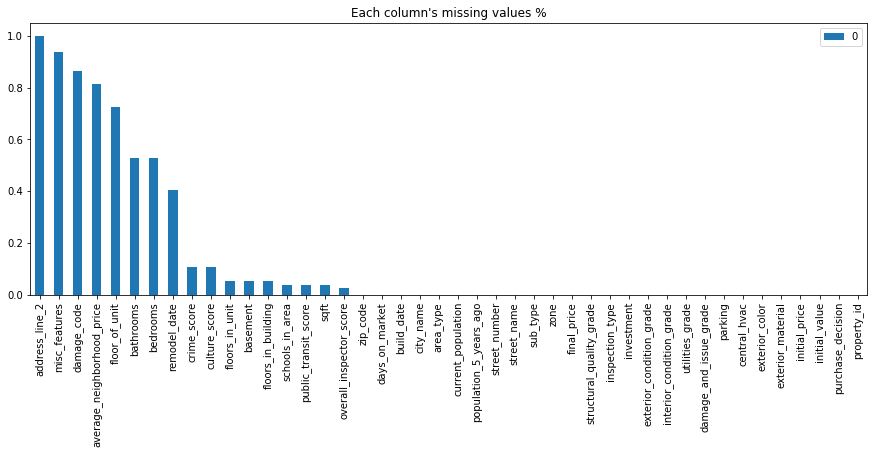

In [41]:
print((df.isnull().sum()[df.isnull().sum()/len(df)>0]/len(df)).sort_values(ascending =False))
pd.DataFrame((df.isnull().sum()/len(df)).sort_values(ascending =False)).plot(kind='bar',figsize=(15,5),title='Each column\'s missing values %')

In [44]:
# drop columns with missing values > 70%
df.drop(['address_line_2','misc_features','damage_code','average_neighborhood_price','floor_of_unit'],axis=1,inplace=True)

In [45]:
# drop useless columns
df.drop(['property_id','street_name','purchase_decision'],axis=1,inplace=True)

In [46]:
# number of classes for each category variable
for i in df.select_dtypes(include=['object']).columns.tolist():
    print(i,len(df[i].value_counts()))

zone 4
sub_type 11
street_number 4902
city_name 1805
zip_code 1942
build_date 15338
remodel_date 7916
area_type 3
inspection_type 5
structural_quality_grade 6
exterior_condition_grade 6
interior_condition_grade 6
utilities_grade 6
damage_and_issue_grade 6
parking 2
basement 2
central_hvac 2
exterior_color 11
exterior_material 8


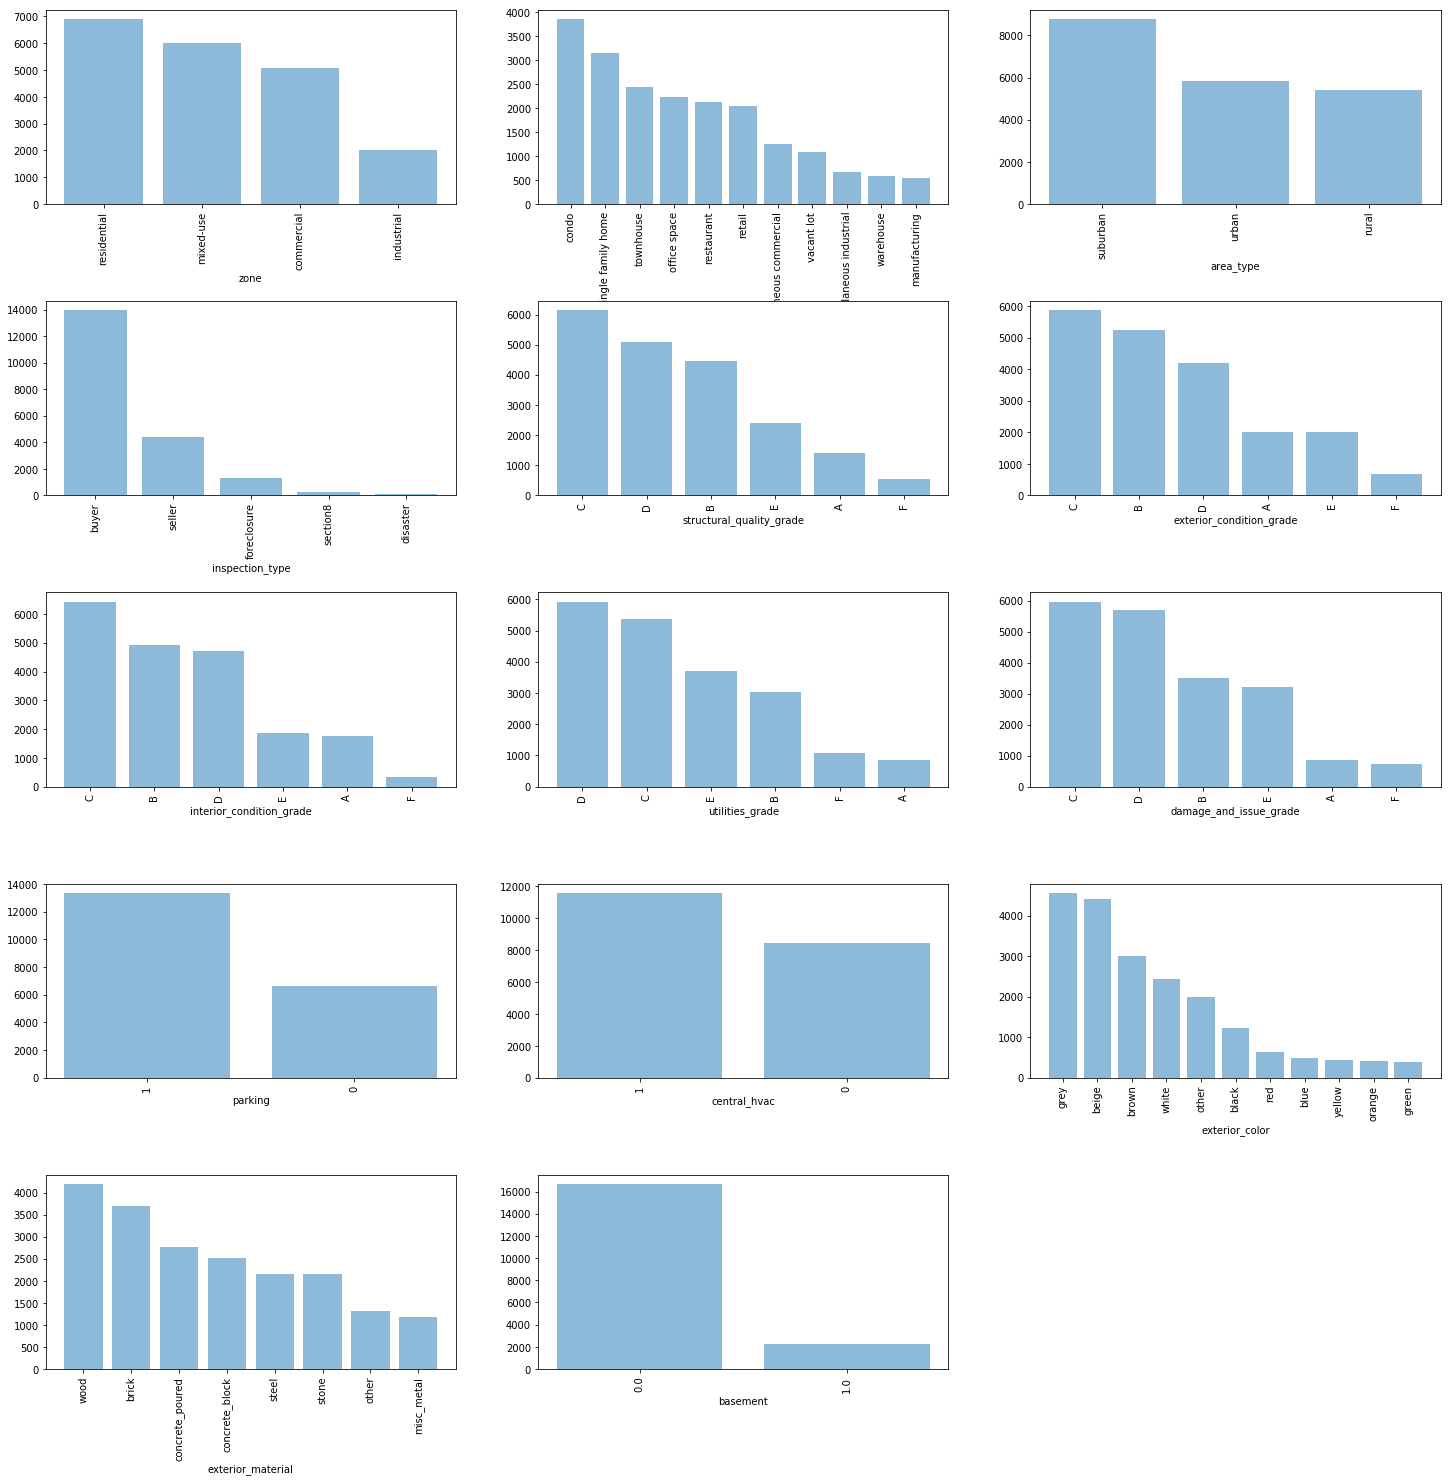

In [47]:
l_cat=['zone','sub_type','area_type','inspection_type','structural_quality_grade','exterior_condition_grade','interior_condition_grade',
      'utilities_grade','damage_and_issue_grade','parking','central_hvac','exterior_color','exterior_material','basement']

fig = plt.figure(figsize=(25,25))
plt.subplots_adjust(hspace = 0.5)
for i in range(len(l_cat)):
    ax=fig.add_subplot(5, 3, i+1)
    obj=df[l_cat[i]].value_counts().index.tolist()
    ind=np.arange(len(obj))
    values=df[l_cat[i]].value_counts().values.tolist()
    ax.bar(ind,values,align='center', alpha=0.5)
    ax.set_xticks(ind)
    ax.set_xticklabels(obj)
    ax.set_xlabel(l_cat[i])
    plt.setp(ax.get_xticklabels(), rotation='vertical')

In [60]:
df.columns

Index(['zone', 'sub_type', 'street_number', 'city_name', 'zip_code',
       'days_on_market', 'build_date', 'remodel_date', 'area_type',
       'current_population', 'population_5_years_ago', 'schools_in_area',
       'public_transit_score', 'crime_score', 'culture_score',
       'inspection_type', 'structural_quality_grade',
       'exterior_condition_grade', 'interior_condition_grade',
       'utilities_grade', 'damage_and_issue_grade', 'overall_inspector_score',
       'sqft', 'floors_in_building', 'floors_in_unit', 'bedrooms', 'bathrooms',
       'parking', 'basement', 'central_hvac', 'exterior_color',
       'exterior_material', 'initial_price', 'initial_value', 'investment',
       'final_price'],
      dtype='object')

In [59]:
df.loc[:,['city_name','zip_code']]

,city_name,zip_code
0,Kellyfurt,91133
1,New Gilbertside,66853
2,South Robertville,99996
3,Kellyland,25448
4,South Suzannemouth,40464
5,Roberthaven,25553
6,New Kayleemouth,35112
7,Roseland,68536
8,Hannahfurt,85083
9,Davieschester,52730


In [ ]:
# didn't include ['street_number','city_name','zip_code']

In [14]:
df['build_days']=2018-df.build_date.str[:4].apply(lambda x: int(x))
df['remodel_days']=2018-df.remodel_date.dropna().str[:4].apply(lambda x: int(x)) 

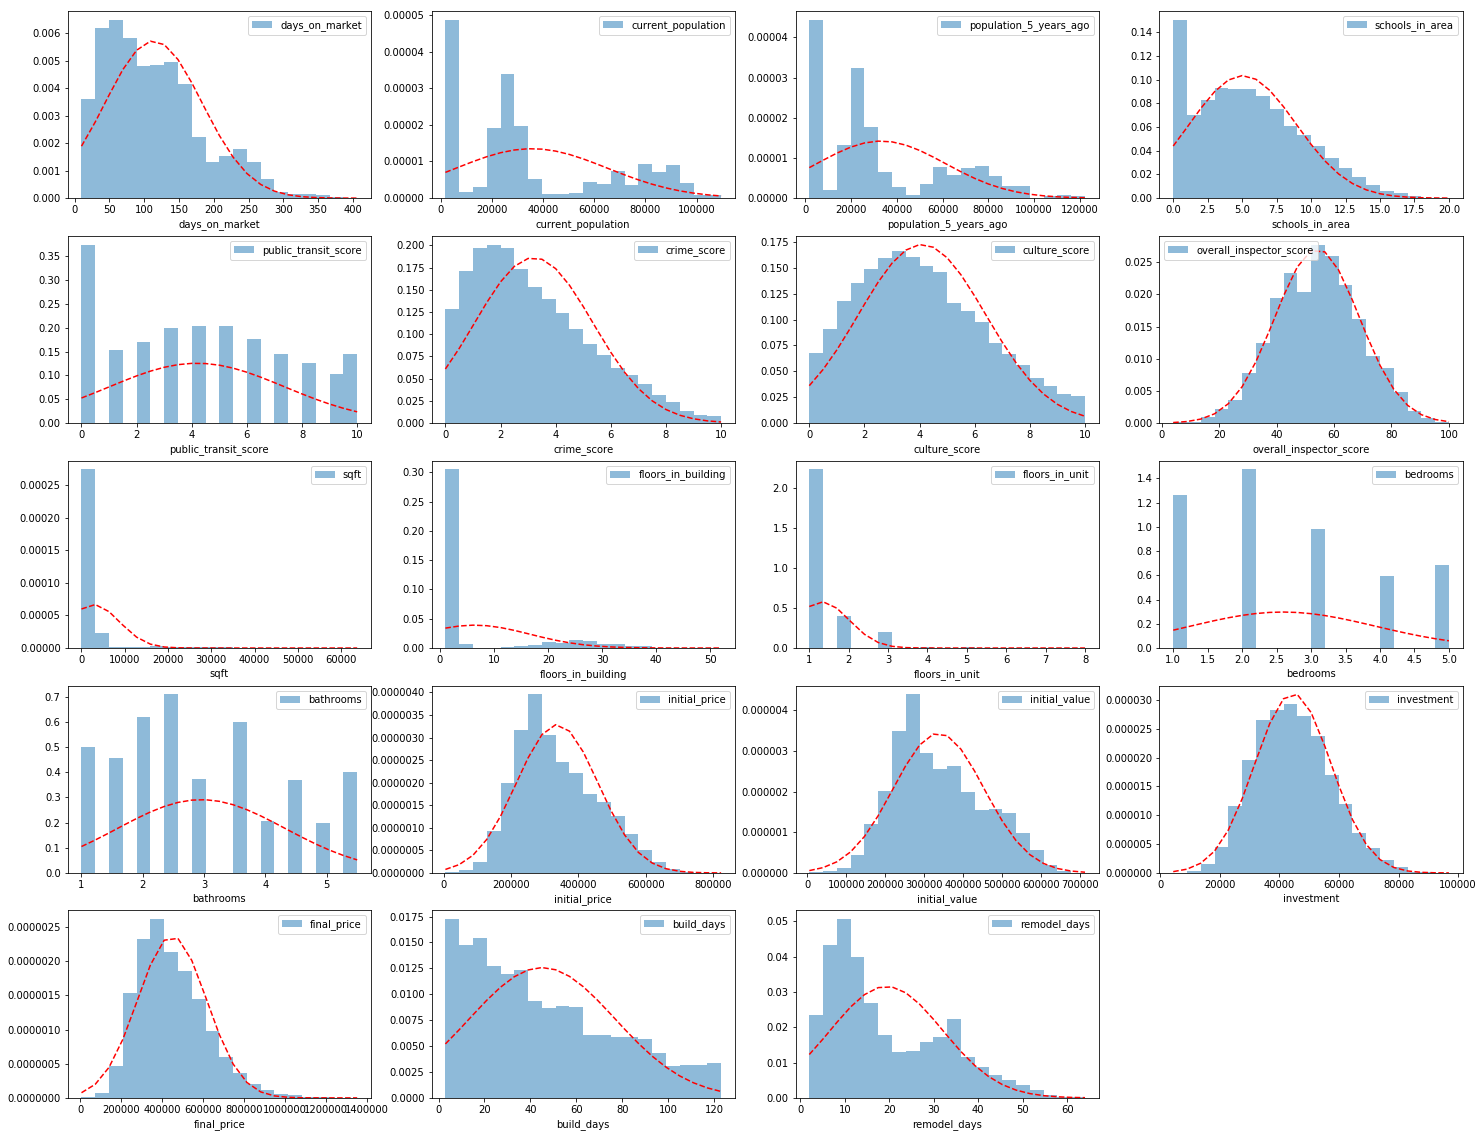

In [15]:
l_num=df.select_dtypes(exclude=['object']).columns
fig = plt.figure(figsize=(25,20))
for i in range(len(l_num)):
    ax=fig.add_subplot(5, 4, i+1)
    mu=df[l_num[i]].mean()
    sigma=df[l_num[i]].std()
    num_bins = 20
    n, bins, patches =ax.hist(df[l_num[i]].dropna(), num_bins, normed=1, alpha=0.5)
    # add a 'best fit' line
    y = matplotlib.mlab.normpdf(bins, mu, sigma)
    ax.plot(bins, y, 'r--')
    ax.set_xlabel(l_num[i])
    ax.legend()

### Linear Regression

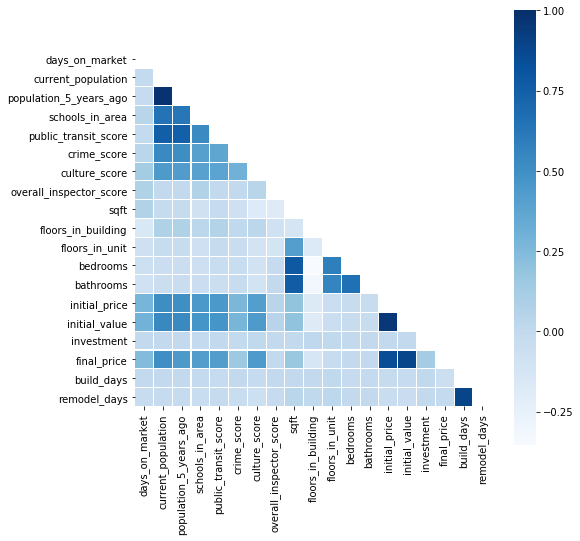

In [16]:
corr=df.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(8,8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,cmap=plt.cm.Blues,mask=mask,square=True,annot_kws={'size':8},linewidths=0.1)

#### Highly correlated independent variables
* build_days--remodel_days
* sqrft,floors_in_unit--bedromms,bathrooms
* curent_population--population_5_years_ago,schools_in_area,public_transit_score,crime_score,culture_score

#### Independent variables correlated with dependent variables
* current_population
* population_5_years_ago
* schools_in_area
* public_transit_score
* culture_score

#### Investment seems not correlates with anything!!!

In [20]:
df.drop(['remodel_days','remodel_date','build_date'],axis=1,inplace=True)

In [23]:
(df.isnull().sum()[df.isnull().sum()/len(df)>0]/len(df)).sort_values(ascending =False)

bathrooms                  0.52785
bedrooms                   0.52785
crime_score                0.10765
culture_score              0.10625
basement                   0.05395
floors_in_unit             0.05395
floors_in_building         0.05395
public_transit_score       0.03840
schools_in_area            0.03840
sqft                       0.03790
overall_inspector_score    0.02510
dtype: float64

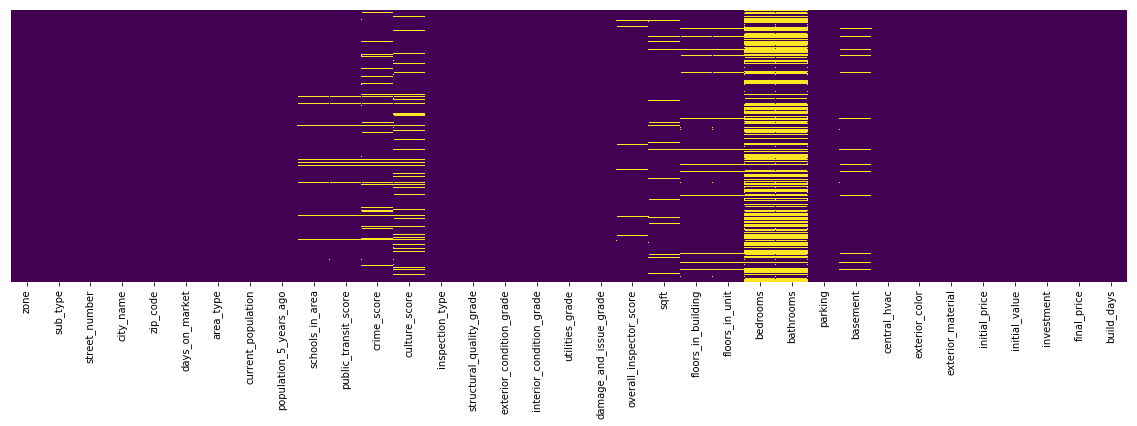

In [21]:
# missing values distribution
plt.figure(figsize=(20,5))
sns.set_context(font_scale=10)  
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### zip code

In [61]:
os.chdir('E:\personal project\enova mockdown\zip_code')

#### use online zipcode sources

But I could only find 10,000+ zipcode in those resources

In [189]:
z1=pd.read_csv('us_postal_codes.csv')
z2=pd.read_csv('zip_codes_states.csv')
z3=pd.read_csv('ZIP-COUNTY-FIPS_2017-06.csv')
z4=pd.read_csv('free-zipcode-database-Primary.csv')

In [190]:
name=['zip_code','city','county','state','lat','long','fp']

In [191]:
z1['fp']=np.nan
z1=z1[['Zip Code','Place Name','County','State','Latitude','Longitude','fp']]
z1.columns=name

In [192]:
z2['fp']=np.nan
z2=z2[['zip_code','city','county','state','latitude','longitude','fp']]
z2.columns=name

In [193]:
extra=z2[z2.zip_code.isin(list(set(z2.zip_code).difference(z1.zip_code)))]
z_total=pd.concat([z1,extra],axis=0)

In [194]:
z3['city']=np.nan
z3['lat']=np.nan
z3['long']=np.nan
z3=z3[['ZIP','city','COUNTYNAME','STATE','lat','long','STCOUNTYFP']]
z3.columns=name

In [195]:
extra=z3[z3.zip_code.isin(list(set(z3.zip_code).difference(z_total.zip_code)))]
z_total=pd.concat([z_total,extra],axis=0)

In [196]:
len(z_total)

43182

In [197]:
z4['fp']=np.nan
z4['county']=np.nan
z4=z4[['Zipcode','City','county','State','Lat','Long','fp']]
z4.columns=name

In [198]:
extra=z4[z4.zip_code.isin(list(set(z4.zip_code).difference(z_total.zip_code)))]
z_total=pd.concat([z_total,extra],axis=0)

In [199]:
len(z_total)

43440

In [201]:
z_total.reset_index(drop=True,inplace=True)

In [202]:
z_total

,zip_code,city,county,state,lat,long,fp
0,501,Holtsville,Suffolk,New York,40.8154,-73.0451,NaN
1,544,Holtsville,Suffolk,New York,40.8154,-73.0451,NaN
2,1001,Agawam,Hampden,Massachusetts,42.0702,-72.6227,NaN
3,1002,Amherst,Hampshire,Massachusetts,42.3671,-72.4646,NaN
4,1003,Amherst,Hampshire,Massachusetts,42.3919,-72.5248,NaN
5,1004,Amherst,Hampshire,Massachusetts,42.3845,-72.5132,NaN
6,1005,Barre,Worcester,Massachusetts,42.4097,-72.1084,NaN
7,1007,Belchertown,Hampshire,Massachusetts,42.2751,-72.4110,NaN
8,1008,Blandford,Hampden,Massachusetts,42.1829,-72.9361,NaN
9,1009,Bondsville,Hampden,Massachusetts,42.2061,-72.3405,NaN


In [203]:
z_total.to_csv('zip_code_dict.csv',index=False)

#### use python zipcode package 

https://pypi.org/project/zipcode/

https://pythonhosted.org/uszipcode/

But it is still very limited, can only extend 581 unknown zipcodes

In [229]:
from uszipcode import ZipcodeSearchEngine

In [231]:
search = ZipcodeSearchEngine()

In [260]:
z_rest=set(df.zip_code).difference(set(z_total))
res=[]
for i in z_rest:
    if search.by_zipcode(str(i)).Zipcode!=None:
        res.append(i)

In [257]:
len(res)

581

#### use prefix to extract state information

In [265]:
import requests
from bs4 import BeautifulSoup

In [266]:
r=requests.get('https://stevemorse.org/jcal/zipdetails.html')

In [318]:
soup=BeautifulSoup(r.content,'lxml')

In [320]:
tb=soup.find_all('script')[1]

In [301]:
import re

In [660]:
zipcode_dict=dict()
for i in tb.contents[0].split('\n'):
    if re.search(r'\[\s*\S*\s"\w',i)!=None:
        res=re.search(r'(\[\s*)(\d*)(,\s")([\S*\s]+)(")',i).group(2,4)
        zipcode_dict[res[0]]=res[1][-2:]

In [661]:
zipcode_dict['5']

'NY'

In [662]:
df['pre_zip']=df.zip_code.apply(lambda x: str(x)[:-2])
df['State']=df.pre_zip.apply(lambda x: zipcode_dict[x] if x in zipcode_dict.keys() else np.nan)

In [703]:
df.columns

Index(['zone', 'sub_type', 'street_number', 'city_name', 'zip_code',
       'days_on_market', 'build_date', 'remodel_date', 'area_type',
       'current_population', 'population_5_years_ago', 'schools_in_area',
       'public_transit_score', 'crime_score', 'culture_score',
       'inspection_type', 'structural_quality_grade',
       'exterior_condition_grade', 'interior_condition_grade',
       'utilities_grade', 'damage_and_issue_grade', 'overall_inspector_score',
       'sqft', 'floors_in_building', 'floors_in_unit', 'bedrooms', 'bathrooms',
       'parking', 'basement', 'central_hvac', 'exterior_color',
       'exterior_material', 'initial_price', 'initial_value', 'investment',
       'final_price', 'pre_zip', 'State'],
      dtype='object')

In [720]:
df['return']=df.final_price-

,zone,sub_type,street_number,city_name,zip_code,days_on_market,build_date,remodel_date,area_type,current_population,...,basement,central_hvac,exterior_color,exterior_material,initial_price,initial_value,investment,final_price,pre_zip,State
0,residential,single family home,45,Kellyfurt,91133,65,1971-11-22,2002-11-18,rural,5300,...,1,0,grey,wood,128000.0,119400.0,41590,155000.0,911,CA
1,residential,townhouse,13,New Gilbertside,66853,33,1977-12-01,2001-11-14,rural,5300,...,0,1,grey,wood,184000.0,188500.0,34950,237000.0,668,KS
2,residential,single family home,68,South Robertville,99996,69,2012-09-19,2014-07-29,rural,5200,...,1,1,white,brick,224000.0,218500.0,61050,278000.0,999,AK
3,residential,townhouse,51,Kellyland,25448,119,1904-09-23,1974-10-13,suburban,20300,...,0,0,grey,brick,263000.0,277900.0,54320,361000.0,254,WV
4,residential,single family home,275,South Suzannemouth,40464,110,1916-12-05,1981-02-06,suburban,20800,...,0,1,other,concrete_poured,265000.0,265700.0,44690,323000.0,404,KY
5,mixed-use,office space,285,Roberthaven,25553,87,1966-08-05,NaN,urban,59100,...,0,0,beige,concrete_block,454000.0,584600.0,63780,583000.0,255,WV
6,industrial,vacant lot,752,New Kayleemouth,35112,90,1931-07-16,1984-02-26,suburban,30000,...,NaN,0,grey,steel,533000.0,475300.0,53500,508000.0,351,AL
7,mixed-use,townhouse,7888,Roseland,68536,258,1991-01-01,NaN,suburban,25600,...,1,1,grey,concrete_block,398000.0,415400.0,40530,633000.0,685,NE
8,commercial,restaurant,254,Hannahfurt,85083,157,1999-07-21,NaN,urban,90600,...,0,0,blue,steel,544000.0,525500.0,39150,743000.0,850,AZ
9,mixed-use,condo,65,Davieschester,52730,191,1979-12-17,NaN,rural,7000,...,0,0,grey,steel,295000.0,288400.0,40000,399000.0,527,IA


In [711]:
df_st_inv=df.groupby(by='State')['investment'].describe()

In [714]:
df_st_inv['state']=df_st_inv.index

In [716]:
df_st_inv.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'state'], dtype='object')

In [723]:
import plotly.plotly as py

for col in df_st_inv.columns:
    df_st_inv[col] = df_st_inv[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_st_inv['text'] = df_st_inv['state'] + '<br>' +\
    ' Count '+df_st_inv['count']+'<br>'+\
    ' Mean '+df_st_inv['mean']+'<br>'+\
    ' Min '+df_st_inv['min']+'<br>'+\
    ' 25% '+df_st_inv['25%']+'<br>'+\
    ' 50% '+df_st_inv['50%']+'<br>'+\
    ' 75% '+df_st_inv['75%']+'<br>'+\
    ' Max '+df_st_inv['max']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_st_inv['state'],
        z = df_st_inv['mean'].astype(float),
        locationmode = 'USA-states',
        text = df_st_inv['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Investment USD")
        ) ]

layout = dict(
        title = 'Investment',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )